In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, MACCSkeys, rdFingerprintGenerator, PandasTools, Descriptors
import matplotlib.pyplot as plt

In [2]:
smiles = [
    "CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O",
    "CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C",
    "C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl",
    "CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC",
    "C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C",
    "CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4O)O)O)O)C(=O)N)N(C)C)O",
    "CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O"
]

names = [
    "Doxycycline",
    "Amoxicilline",
    "Furosemide",
    "Glycol dilaurate",
    "Hydrochlorothiazide",
    "Isotretinoin",
    "Tetracycline",
    "Hemi-cycline D"
]

In [3]:
molecules = pd.DataFrame({'smiles': smiles, 'name':names})
molecules

,smiles,name
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicilline
2,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,Furosemide
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol dilaurate
4,C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl,Hydrochlorothiazide
5,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C,Isotretinoin
6,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Tetracycline
7,CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O,Hemi-cycline D


,smiles,name,ROMol
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicilline,
2,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,Furosemide,
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol dilaurate,
4,C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl,Hydrochlorothiazide,
5,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C,Isotretinoin,
6,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Tetracycline,
7,CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O,Hemi-cycline D,

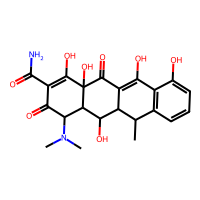
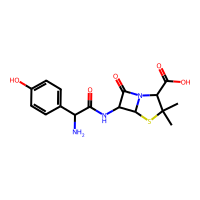
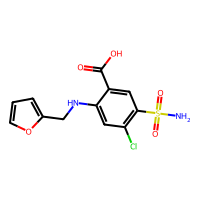
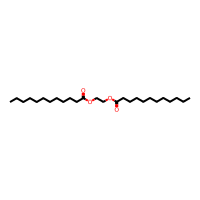
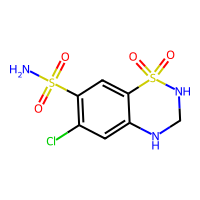
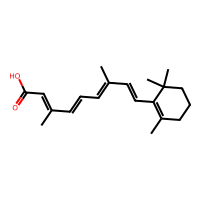
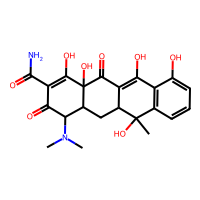
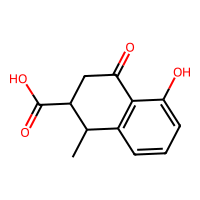

In [4]:
PandasTools.AddMoleculeColumnToFrame(molecules, smilesCol='smiles')
molecules

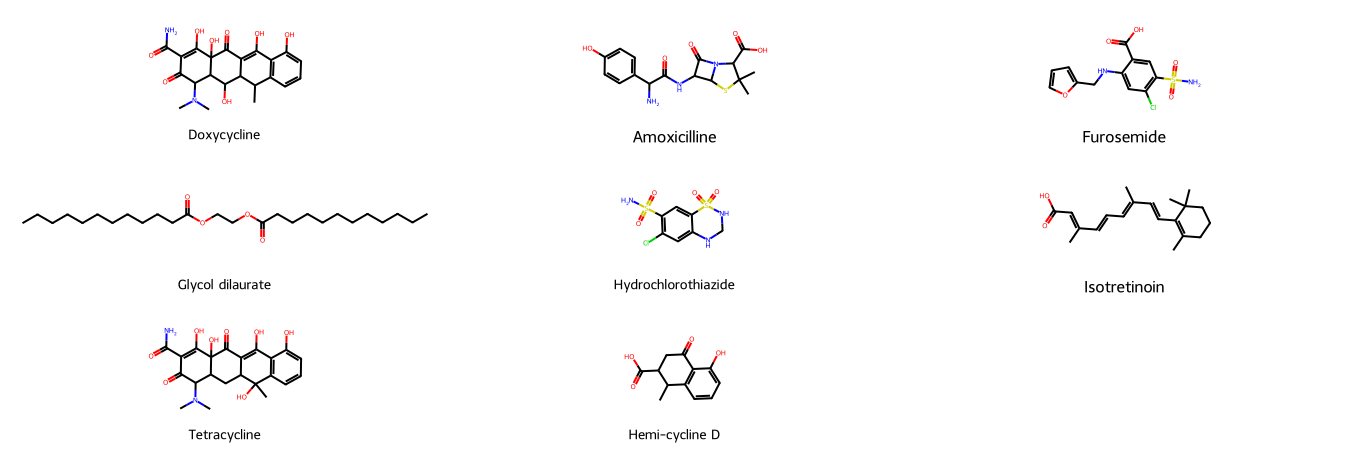

In [5]:
Draw.MolsToGridImage(
    molecules['ROMol'].to_list(),
    legends=molecules['name'].to_list(),
    molsPerRow=3,
    subImgSize=(450, 150)
)

In [6]:
molecules['molecular_weight'] = molecules['ROMol'].apply(Descriptors.ExactMolWt)

In [7]:
molecules.sort_values(by='molecular_weight', ascending=False, inplace=True)

,smiles,name,ROMol,molecular_weight
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,,444.153266
6,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Tetracycline,,444.153266
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol dilaurate,,426.370910
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicilline,,365.104542
2,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,Furosemide,,330.007720
5,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C,Isotretinoin,,300.208930
4,C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl,Hydrochlorothiazide,,296.964475
7,CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O,Hemi-cycline D,,220.073559

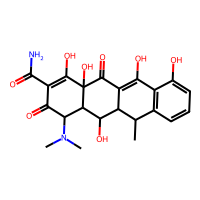
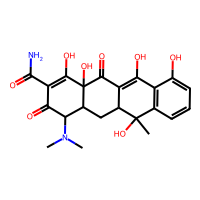
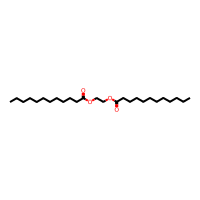
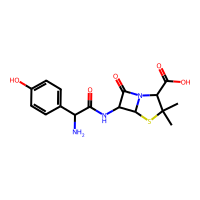
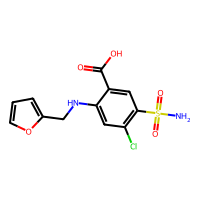
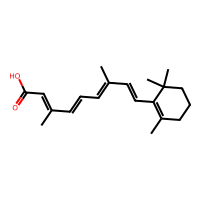
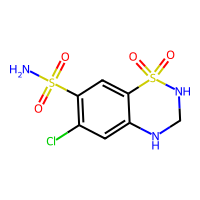
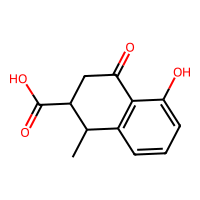

In [8]:
molecules

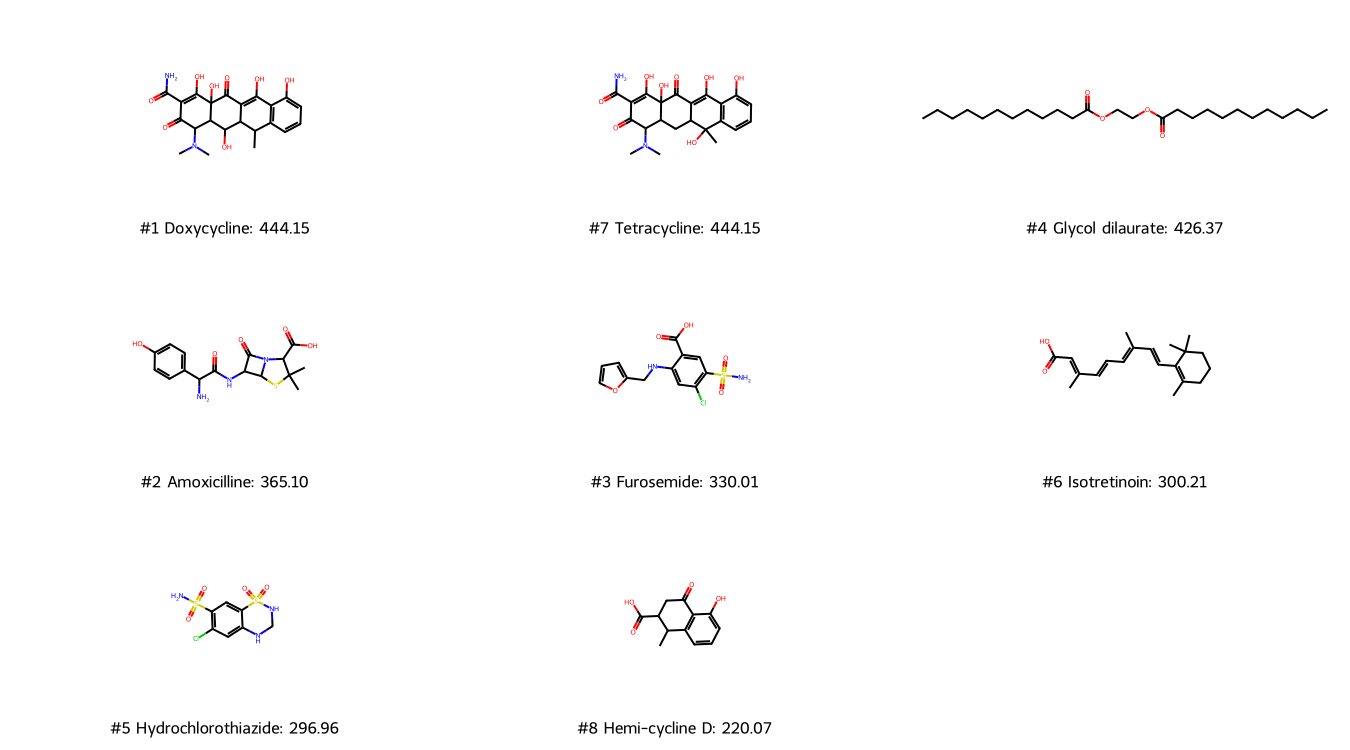

In [9]:
Draw.MolsToGridImage(
    molecules['ROMol'].to_list(),
    legends=[
        f"#{ind+1} {row['name']}: {row['molecular_weight']:.2f}" for ind, row in molecules.iterrows()
    ],
    molsPerRow=3,
    subImgSize=(450, 250)
)

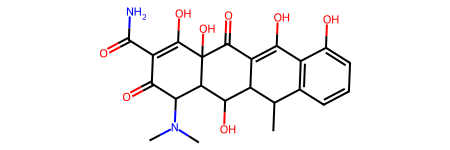

In [10]:
molek = molecules['ROMol'][0]
molek

In [11]:
molek_maccs = MACCSkeys.GenMACCSKeys(molek)

In [12]:
molek_maccs

In [13]:
molek_maccs.ToBitString()

'00000000000000000000000000100000000000000000000000100110000000000010000010101000000011100100110101010100010000101100010000100001000101001001111111101111101011111111110'

In [14]:
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)
molek_morgan_int = morgan_gen.GetCountFingerprint(molek)
molek_morgan_int

In [15]:
print(molek_morgan_int.GetNonzeroElements())

{45: 1, 118: 1, 140: 1, 163: 1, 276: 1, 303: 1, 309: 1, 314: 2, 371: 1, 438: 1, 525: 1, 557: 1, 650: 3, 673: 1, 699: 1, 807: 6, 824: 1, 829: 1, 881: 1, 1009: 1, 1019: 5, 1027: 1, 1039: 1, 1057: 3, 1060: 1, 1061: 1, 1070: 1, 1082: 1, 1088: 1, 1119: 1, 1154: 1, 1163: 2, 1171: 1, 1257: 1, 1296: 1, 1309: 1, 1341: 1, 1380: 9, 1389: 1, 1457: 1, 1471: 1, 1487: 1, 1582: 1, 1602: 3, 1607: 1, 1630: 1, 1747: 1, 1750: 2, 1831: 1, 1833: 1, 1857: 1, 1873: 3, 1917: 1, 1932: 1, 2000: 1, 2029: 1}


In [16]:
molek_morgan_bit = morgan_gen.GetFingerprint(molek)
molek_morgan_bit

In [17]:
molek_morgan_bit.ToBitString()

'000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000001000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000100000100001000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000010000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000001000010000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [18]:
m1 = molecules['ROMol'][0]
m2 = molecules['ROMol'][1]

In [19]:
m1_maccs = MACCSkeys.GenMACCSKeys(m1)
m2_maccs = MACCSkeys.GenMACCSKeys(m2)
tanito_maccs = DataStructs.TanimotoSimilarity(m1_maccs, m2_maccs)
tanito_maccs

0.5909090909090909

In [20]:
dice_maccs = DataStructs.DiceSimilarity(m1_maccs, m2_maccs)
dice_maccs

0.7428571428571429

In [21]:
DataStructs.TanimotoSimilarity(m1_maccs, m1_maccs)

1.0

In [22]:
m1_morg = morgan_gen.GetFingerprint(m1)
m2_morg = morgan_gen.GetFingerprint(m2)
tanito_morg = DataStructs.TanimotoSimilarity(m1_morg, m2_morg)
tanito_morg

0.14444444444444443

In [23]:
dice_morg = DataStructs.DiceSimilarity(m1_morg, m2_morg)
dice_morg

0.2524271844660194

,smiles,name,ROMol,molecular_weight
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,,444.153266
6,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Tetracycline,,444.153266
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol dilaurate,,426.370910
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicilline,,365.104542
2,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,Furosemide,,330.007720
5,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C,Isotretinoin,,300.208930
4,C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl,Hydrochlorothiazide,,296.964475
7,CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O,Hemi-cycline D,,220.073559

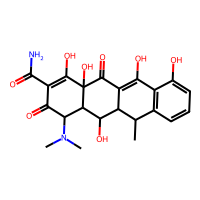
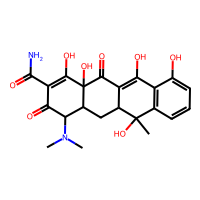
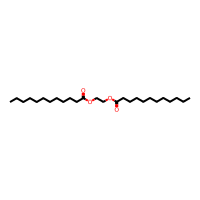
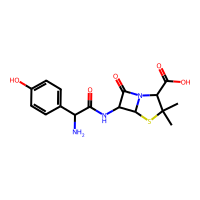
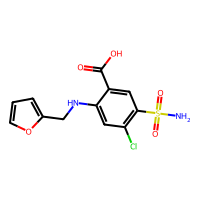
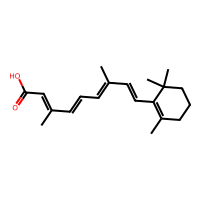
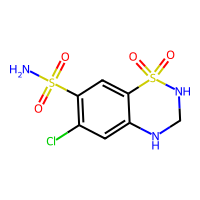
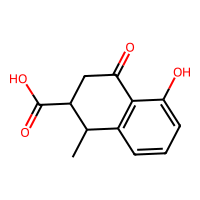

In [24]:
molecules

In [25]:
macss = [MACCSkeys.GenMACCSKeys(mol) for mol in molecules['ROMol'].to_list()]
molecules['tanimoto_maccs'] = DataStructs.BulkTanimotoSimilarity(macss[0], macss)
molecules['dice_maccs'] = DataStructs.BulkDiceSimilarity(macss[0], macss)

In [26]:
morgans = [morgan_gen.GetFingerprint(mol) for mol in molecules['ROMol'].to_list()]
molecules['tanimoto_morgan'] = DataStructs.BulkTanimotoSimilarity(morgans[0], morgans)
molecules['dice_morgan'] = DataStructs.BulkDiceSimilarity(morgans[0], morgans)

In [27]:
molecules[['name', 'tanimoto_morgan', 'dice_morgan', 'tanimoto_maccs', 'dice_maccs']]

,name,tanimoto_morgan,dice_morgan,tanimoto_maccs,dice_maccs
0,Doxycycline,1.000000,1.000000,1.000000,1.000000
6,Tetracycline,0.534247,0.696429,0.928571,0.962963
3,Glycol dilaurate,0.054795,0.103896,0.149254,0.259740
1,Amoxicilline,0.144444,0.252427,0.590909,0.742857
2,Furosemide,0.098901,0.180000,0.321839,0.486957
5,Isotretinoin,0.067416,0.126316,0.288136,0.447368
4,Hydrochlorothiazide,0.058824,0.111111,0.306818,0.469565
7,Hemi-cycline D,0.308824,0.471910,0.403509,0.575000


In [28]:
kolone = ['name', 'tanimoto_morgan', 'dice_morgan', 'tanimoto_maccs', 'dice_maccs']

In [29]:
preview = molecules.sort_values(by='tanimoto_morgan', ascending=False).reset_index()
preview[kolone]

,name,tanimoto_morgan,dice_morgan,tanimoto_maccs,dice_maccs
0,Doxycycline,1.000000,1.000000,1.000000,1.000000
1,Tetracycline,0.534247,0.696429,0.928571,0.962963
2,Hemi-cycline D,0.308824,0.471910,0.403509,0.575000
3,Amoxicilline,0.144444,0.252427,0.590909,0.742857
4,Furosemide,0.098901,0.180000,0.321839,0.486957
5,Isotretinoin,0.067416,0.126316,0.288136,0.447368
6,Hydrochlorothiazide,0.058824,0.111111,0.306818,0.469565
7,Glycol dilaurate,0.054795,0.103896,0.149254,0.259740


In [30]:
def draw_molecules(df, kolona):
    return Draw.MolsToGridImage(
        df['ROMol'].to_list(),
        legends=[
            f"#{ind+1} {row['name']}, similarity={row[kolona]:.2f}" for ind, row in df.iterrows()
        ],
        molsPerRow=3,
        subImgSize=(450, 250)
    )

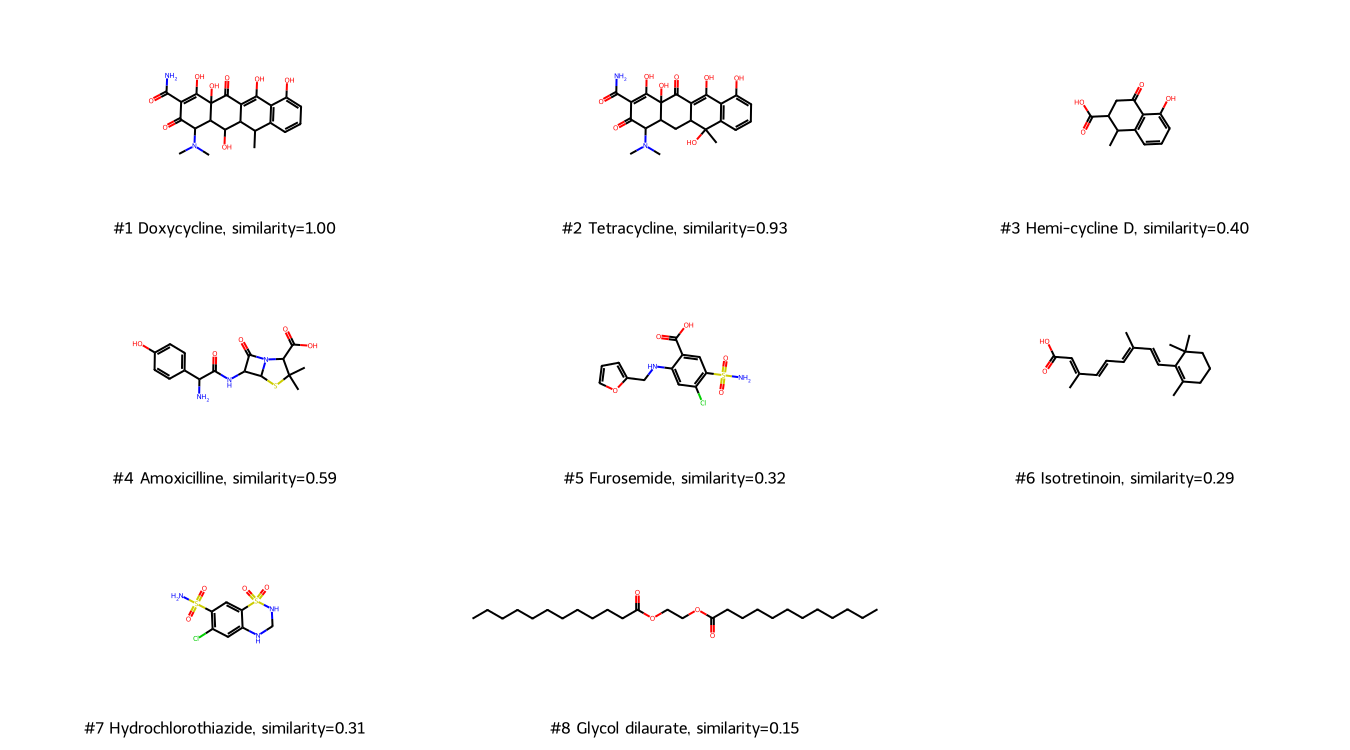

In [31]:
draw_molecules(preview, 'tanimoto_maccs')

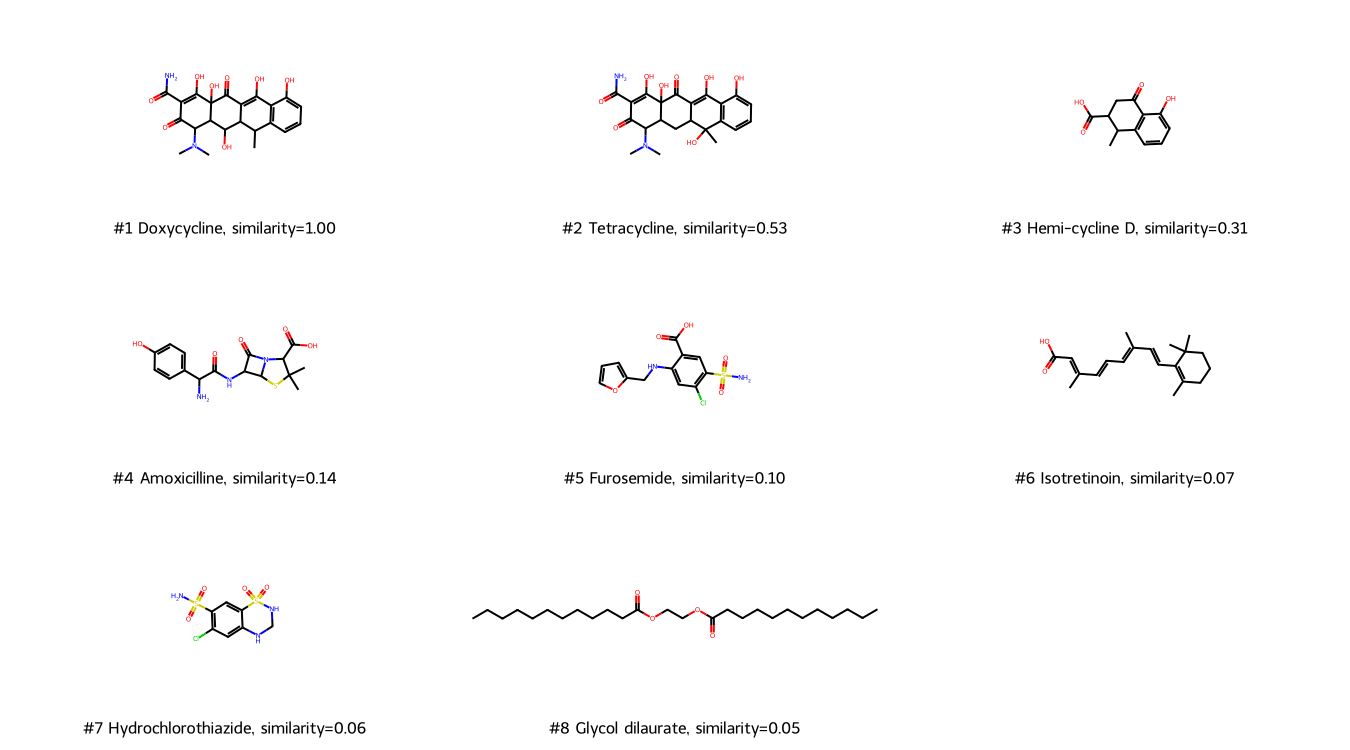

In [32]:
draw_molecules(preview, 'tanimoto_morgan')

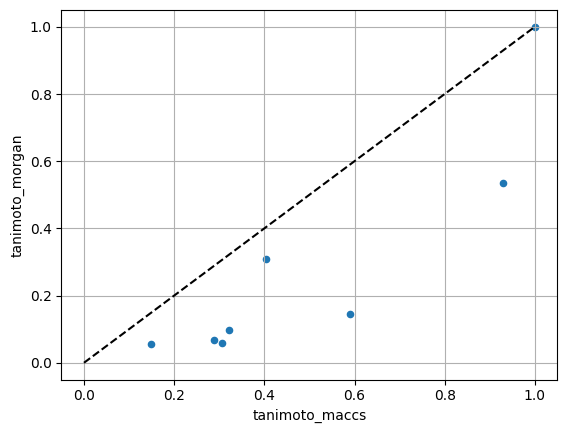

In [33]:
fig, ax =plt.subplots(1, 1)
molecules.plot(x='tanimoto_maccs', y='tanimoto_morgan', kind='scatter', ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', color='k')
ax.grid()

In [34]:
data = pd.read_csv('data/EGFR_compounds_lipinski_1.csv', usecols=['molecule_chembl_id', 'smiles', 'pIC50'])

In [35]:
data.head(2)

,molecule_chembl_id,smiles,pIC50
0,CHEMBL63786,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CHEMBL35820,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849


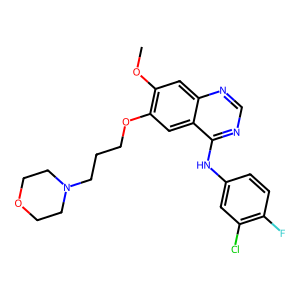

In [36]:
query_smiles = 'COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC(Cl)=C(F)C=C3)=NC=NC2=C1'
query = Chem.MolFromSmiles(query_smiles)
Draw.MolToImage(query)

In [37]:
query_maccs = MACCSkeys.GenMACCSKeys(query)
morgan_gen = rdFingerprintGenerator.GetMorganGenerator()
query_morgan = morgan_gen.GetCountFingerprint(query)

In [38]:
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='smiles')

In [39]:
mcs = data['ROMol'].apply(MACCSkeys.GenMACCSKeys).to_list()
mrgs = data['ROMol'].apply(morgan_gen.GetCountFingerprint).to_list()

In [40]:
data['tanimoto_maccs'] = DataStructs.BulkTanimotoSimilarity(query_maccs, mcs)
data['tanimoto_morgan'] = DataStructs.BulkTanimotoSimilarity(query_morgan, mrgs)
data['dice_maccs'] = DataStructs.BulkDiceSimilarity(query_maccs, mcs)
data['dice_morgan'] = DataStructs.BulkDiceSimilarity(query_morgan, mrgs)

In [42]:
kolone = ['smiles', 'tanimoto_maccs', 'tanimoto_morgan', 'dice_maccs', 'dice_morgan']

In [43]:
preview = data.sort_values(by='tanimoto_morgan', ascending=False).reset_index()
preview[kolone].head()

,smiles,tanimoto_maccs,tanimoto_morgan,dice_maccs,dice_morgan
0,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,1.000000,1.000000,1.000000,1.000000
1,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCN1CCOCC1,1.000000,0.866667,1.000000,0.928571
2,COc1cc2ncnc(Nc3ccc(Cl)c(Cl)c3)c2cc1OCCCN1CCOCC1,0.983333,0.838710,0.991597,0.912281
3,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCCC1,0.919355,0.821138,0.957983,0.901786
4,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCCCC1,0.950000,0.795276,0.974359,0.885965


array([<Axes: title={'center': 'dice_morgan'}>], dtype=object)

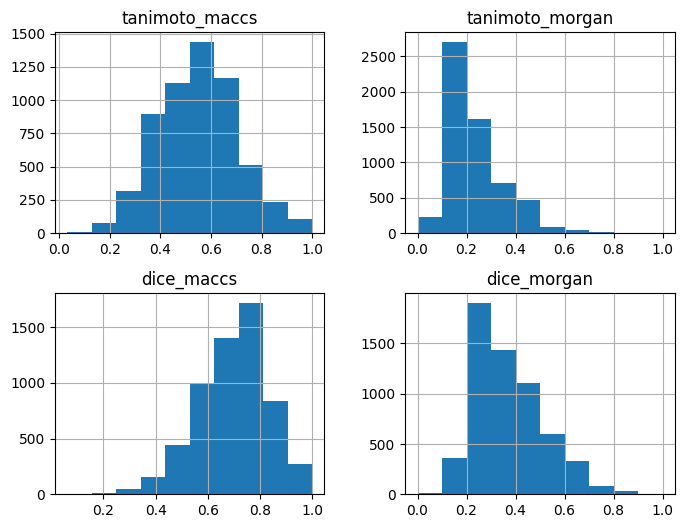

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
data.hist(column='tanimoto_maccs', ax=ax[0, 0])
data.hist(column='tanimoto_morgan', ax=ax[0, 1])
data.hist(column='dice_maccs', ax=ax[1, 0])
data.hist(column='dice_morgan', ax=ax[1, 1])

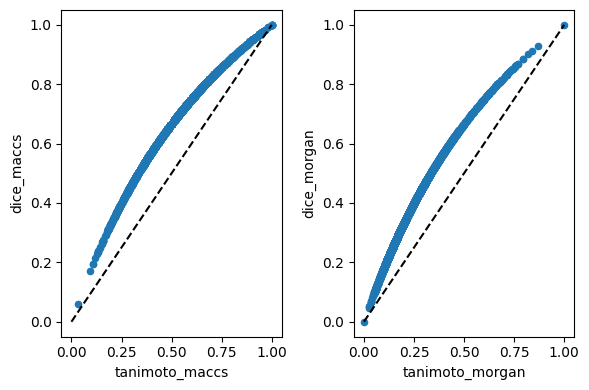

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
data.plot(x='tanimoto_maccs', y='dice_maccs', ax=ax[0], kind='scatter')
ax[0].plot([0, 1], [0, 1], linestyle='--', color='k')
data.plot(x='tanimoto_morgan', y='dice_morgan', ax=ax[1], kind='scatter')
ax[1].plot([0, 1], [0, 1], linestyle='--', color='k')
plt.tight_layout()

In [70]:
top_11 = data.sort_values(by='tanimoto_morgan', ascending=False).reset_index()[:11]

In [71]:
top_11['tanimoto_morgan']

0     1.000000
1     0.866667
2     0.838710
3     0.821138
4     0.795276
5     0.795276
6     0.767442
7     0.767442
8     0.761538
9     0.753968
10    0.751880
Name: tanimoto_morgan, dtype: float64

In [72]:
legends = ['Gefitinib'] + [f"#{ind+1} {row['molecule_chembl_id']} pIC50={row['pIC50']:.2f}" for ind, row in top_11.iterrows()]
legends

['Gefitinib',
 '#1 CHEMBL939 pIC50=6.29',
 '#2 CHEMBL14699 pIC50=8.00',
 '#3 CHEMBL4448162 pIC50=9.00',
 '#4 CHEMBL299672 pIC50=7.15',
 '#5 CHEMBL291514 pIC50=7.10',
 '#6 CHEMBL4858176 pIC50=4.60',
 '#7 CHEMBL2425092 pIC50=7.25',
 '#8 CHEMBL2425093 pIC50=7.44',
 '#9 CHEMBL384699 pIC50=7.29',
 '#10 CHEMBL2425084 pIC50=7.60',
 '#11 CHEMBL2425086 pIC50=7.82']

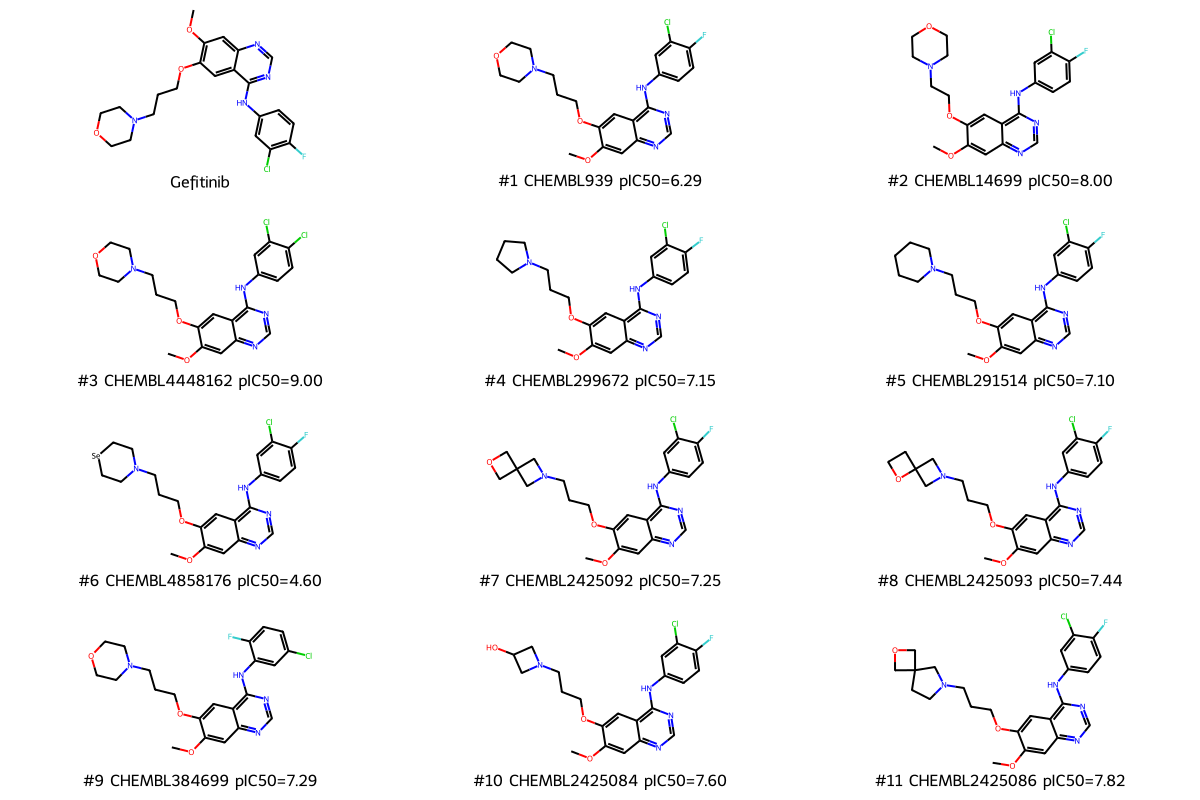

In [74]:
Draw.MolsToGridImage(
    [query] + top_11['ROMol'].to_list(),
    legends=legends,
    molsPerRow=3,
    subImgSize=(400, 200)
)

In [76]:
def get_enrichment_data(molecules, similarity_measure, pic50_cutoff):
    """
    Calculates x and y values for enrichment plot:
        x - % ranked dataset
        y - % true actives identified

    Parameters
    ----------
    molecules : pandas.DataFrame
        Molecules with similarity values to a query molecule.
    similarity_measure : str
        Column name which will be used to sort the DataFrame．
    pic50_cutoff : float
        pIC50 cutoff value used to discriminate active and inactive molecules.

    Returns
    -------
    pandas.DataFrame
        Enrichment data: Percentage of ranked dataset by similarity vs. percentage of identified true actives.
    """

    # Get number of molecules in data set
    molecules_all = len(molecules)

    # Get number of active molecules in data set
    actives_all = sum(molecules["pIC50"] >= pic50_cutoff)

    # Initialize a list that will hold the counter for actives and molecules while iterating through our dataset
    actives_counter_list = []

    # Initialize counter for actives
    actives_counter = 0

    # Note: Data must be ranked for enrichment plots:
    # Sort molecules by selected similarity measure
    molecules.sort_values([similarity_measure], ascending=False, inplace=True)

    # Iterate over the ranked dataset and check each molecule if active (by checking bioactivity)
    for value in molecules["pIC50"]:
        if value >= pic50_cutoff:
            actives_counter += 1
        actives_counter_list.append(actives_counter)

    # Transform number of molecules into % ranked dataset
    molecules_percentage_list = [i / molecules_all for i in range(1, molecules_all + 1)]

    # Transform number of actives into % true actives identified
    actives_percentage_list = [i / actives_all for i in actives_counter_list]

    # Generate DataFrame with x and y values as well as label
    enrichment = pd.DataFrame(
        {
            "% ranked dataset": molecules_percentage_list,
            "% true actives identified": actives_percentage_list,
        }
    )

    return enrichment

In [77]:
pic50_cutoff = 6.3

In [78]:
similarity_measures = ["tanimoto_maccs", "tanimoto_morgan"]
enrichment_data = {
    similarity_measure: get_enrichment_data(data, similarity_measure, pic50_cutoff)
    for similarity_measure in similarity_measures
}

In [79]:
enrichment_data["tanimoto_maccs"].head()

,% ranked dataset,% true actives identified
0,0.000170,0.000276
1,0.000340,0.000551
2,0.000511,0.000551
3,0.000681,0.000827
4,0.000851,0.001103


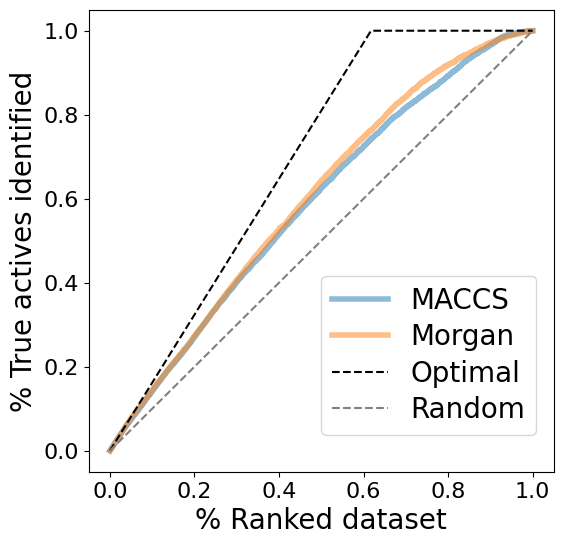

In [80]:
fig, ax = plt.subplots(figsize=(6, 6))

fontsize = 20

# Plot enrichment data
for similarity_measure, enrichment in enrichment_data.items():
    ax = enrichment.plot(
        ax=ax,
        x="% ranked dataset",
        y="% true actives identified",
        label=similarity_measure,
        alpha=0.5,
        linewidth=4,
    )
ax.set_ylabel("% True actives identified", size=fontsize)
ax.set_xlabel("% Ranked dataset", size=fontsize)

# Plot optimal curve: Ratio of actives in dataset
ratio_actives = sum(data["pIC50"] >= pic50_cutoff) / len(data)
ax.plot(
    [0, ratio_actives, 1],
    [0, 1, 1],
    label="Optimal curve",
    color="black",
    linestyle="--",
)

# Plot random curve
ax.plot([0, 1], [0, 1], label="Random curve", color="grey", linestyle="--")

plt.tick_params(labelsize=16)
plt.legend(
    labels=["MACCS", "Morgan", "Optimal", "Random"],
    loc=(0.5, 0.08),
    fontsize=fontsize,
    labelspacing=0.3,
)

# Save plot -- use bbox_inches to include text boxes
# plt.savefig(
#     DATA / "enrichment_plot.png",
#     dpi=300,
#     bbox_inches="tight",
#     transparent=True,
# )

plt.show()

In [81]:
def calculate_enrichment_factor(enrichment, ranked_dataset_percentage_cutoff):
    """
    Get the experimental enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    enrichment : pd.DataFrame
        Enrichment data: Percentage of ranked dataset by similarity vs. percentage of
        identified true actives.
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.

    Returns
    -------
    float
        Experimental enrichment factor.
    """

    # Keep only molecules that meet the cutoff
    enrichment = enrichment[
        enrichment["% ranked dataset"] <= ranked_dataset_percentage_cutoff / 100
    ]
    # Get highest percentage of actives and the corresponding percentage of actives
    highest_enrichment = enrichment.iloc[-1]
    enrichment_factor = round(100 * float(highest_enrichment["% true actives identified"]), 1)
    return enrichment_factor

In [82]:
def calculate_enrichment_factor_random(ranked_dataset_percentage_cutoff):
    """
    Get the random enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.

    Returns
    -------
    float
        Random enrichment factor.
    """

    enrichment_factor_random = round(float(ranked_dataset_percentage_cutoff), 1)
    return enrichment_factor_random


In [83]:
def calculate_enrichment_factor_optimal(molecules, ranked_dataset_percentage_cutoff, pic50_cutoff):
    """
    Get the optimal random enrichment factor for a given percentage of the ranked dataset.

    Parameters
    ----------
    molecules : pandas.DataFrame
        the DataFrame with all the molecules and pIC50.
    ranked_dataset_percentage_cutoff : float or int
        Percentage of ranked dataset to be included in enrichment factor calculation.
    activity_cutoff: float
        pIC50 cutoff value used to discriminate active and inactive molecules

    Returns
    -------
    float
        Optimal enrichment factor.
    """

    ratio = sum(molecules["pIC50"] >= pic50_cutoff) / len(molecules) * 100
    if ranked_dataset_percentage_cutoff <= ratio:
        enrichment_factor_optimal = round(100 / ratio * ranked_dataset_percentage_cutoff, 1)
    else:
        enrichment_factor_optimal = 100.0
    return enrichment_factor_optimal

In [84]:
ranked_dataset_percentage_cutoff = 5

In [85]:
for similarity_measure, enrichment in enrichment_data.items():
    enrichment_factor = calculate_enrichment_factor(enrichment, ranked_dataset_percentage_cutoff)
    print(
        f"Experimental EF for {ranked_dataset_percentage_cutoff}% of ranked dataset ({similarity_measure}): {enrichment_factor}%"
    )

Experimental EF for 5% of ranked dataset (tanimoto_maccs): 7.4%
Experimental EF for 5% of ranked dataset (tanimoto_morgan): 7.7%


In [87]:
enrichment_factor_random = calculate_enrichment_factor_random(ranked_dataset_percentage_cutoff)
print(
    f"Random EF for {ranked_dataset_percentage_cutoff}% of ranked dataset: {enrichment_factor_random}%"
)
enrichment_factor_optimal = calculate_enrichment_factor_optimal(
    data, ranked_dataset_percentage_cutoff, pic50_cutoff
)
print(
    f"Optimal EF for {ranked_dataset_percentage_cutoff}% of ranked dataset: {enrichment_factor_optimal}%"
)

Random EF for 5% of ranked dataset: 5.0%
Optimal EF for 5% of ranked dataset: 8.1%
